In [1]:
import time, sys

# Import the Qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QiskitError
from qiskit import execute, IBMQ, BasicAer, transpiler, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.mapper import Layout

import numpy as np
import qiskit

# Define your backend

In [2]:
from qiskit import IBMQ

# insert your token & URL here
IBMQ.enable_account('<token>',
                    url='<url>')

# check available backends
print("Available backends:")
IBMQ.backends()

Remote backend "ibmqx_qasm_simulator" could not be instantiated due to an invalid config: {'memory': ['Missing data for required field.'], 'backend_version': ['Missing data for required field.'], 'backend_name': ['Missing data for required field.'], 'open_pulse': ['Missing data for required field.'], 'basis_gates': ['Missing data for required field.'], 'local': ['Missing data for required field.'], 'gates': {0: {'parameters': ['Missing data for required field.'], 'name': ['Missing data for required field.'], 'qasm_def': ['Missing data for required field.']}}, 'n_qubits': ['Missing data for required field.'], 'conditional': ['Missing data for required field.'], 'max_shots': ['Missing data for required field.']}


Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-ornl, bes-qis, argonne)>]

# Define the layout

In [3]:
# execute on the IBM Tokyo 20 Qubit Machine
#backend = IBMQ.get_backend('ibmq_qasm_simulator')
backend = IBMQ.get_backend('ibmq_20_tokyo')
print(backend)
backend.status()

ibmq_20_tokyo


BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.2.6', operational=True, pending_jobs=0, status_msg='active')

# Define the UCCSD ansatz circuit

In [4]:
def get_ucc_ansatz(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.ry(theta, 1)
    circuit.cx(1, 0)
    return circuit

# Define the naive measurement circuits

In [5]:
shots1 = 25

def measure_zi_simple(theta, ZI_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    ZI_job_IDs.append(job.job_id())
    
def measure_iz_simple(theta, IZ_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    IZ_job_IDs.append(job.job_id())
    
def measure_xx_simple(theta, XX_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    XX_job_IDs.append(job.job_id())

def measure_yy_simple(theta, YY_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(1)
    circuit.sdg(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    YY_job_IDs.append(job.job_id())

def measure_hamiltonian_simple(theta, ZI_job_IDs, IZ_job_IDs, XX_job_IDs, YY_job_IDs):
    measure_zi_simple(theta, ZI_job_IDs)
    measure_iz_simple(theta, IZ_job_IDs)
    measure_xx_simple(theta, XX_job_IDs)
    measure_yy_simple(theta, YY_job_IDs)

# Define the simultaneous measurement circuits

In [6]:
shots2 = 50

def measure_zi_and_iz(theta, ZI_and_IZ_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots2)
    print(job.job_id())
    ZI_and_IZ_job_IDs.append(job.job_id())
    
def measure_xx_and_yy(theta, XX_and_YY_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots2)
    print(job.job_id())
    XX_and_YY_job_IDs.append(job.job_id())

def measure_simultaneously_hamiltonian_simple(theta, ZI_and_IZ_job_IDs, XX_and_YY_job_IDs):
    measure_zi_and_iz(theta, ZI_and_IZ_job_IDs)
    measure_xx_and_yy(theta, XX_and_YY_job_IDs)

# Submit the job to Qiskit and get the job IDs

In [7]:
import numpy as np
import qiskit

ZI_job_IDs = []
IZ_job_IDs = []
XX_job_IDs = []
YY_job_IDs = []

ZI_and_IZ_job_IDs = []
XX_and_YY_job_IDs = []

theta_values = []

for theta in np.arange(-np.pi, np.pi, np.pi / 12):
    print(theta)
    measure_hamiltonian_simple(theta, ZI_job_IDs, IZ_job_IDs, XX_job_IDs, YY_job_IDs)
    measure_simultaneously_hamiltonian_simple(theta, ZI_and_IZ_job_IDs, XX_and_YY_job_IDs)
    theta_values.append(theta)
print('Done!')

-3.141592653589793
5d3b6e7b9bb742001ac32d8c
5d3b6e7f6c947600181bb414
5d3b6e84f8ffa90019ad2c42
5d3b6e88b61d040018076b2d
5d3b6e8db61d040018076b2f
5d3b6e91b61d040018076b31
-2.8797932657906435
5d3b6e956c947600181bb416
5d3b6e9a5e9f6500181e74da
5d3b6e9eb61d040018076b33
5d3b6ea1a06411001849a8de
5d3b6ea6f22d1200183f9f21
5d3b6eaaf22d1200183f9f23
-2.617993877991494
5d3b6eae5e9f6500181e74dc
5d3b6eb2b411ea00186e46b9
5d3b6eb6a06411001849a8e0
5d3b6ebaa06411001849a8e2
5d3b6ebfb61d040018076b35
5d3b6ec3f22d1200183f9f25
-2.3561944901923444
5d3b6ec7f22d1200183f9f27
5d3b6ecb5e9f6500181e74de
5d3b6ecfb411ea00186e46bb
5d3b6ed3b411ea00186e46bd
5d3b6ed7b411ea00186e46bf
5d3b6edb9bb742001ac32d8e
-2.094395102393195
5d3b6edffb29900018d5fadf
5d3b6ee35e9f6500181e74e0
5d3b6ee7f8ffa90019ad2c44
5d3b6eebb61d040018076b37
5d3b6eeff8ffa90019ad2c46
5d3b6ef4a06411001849a8e4
-1.8325957145940452
5d3b6ef8b61d040018076b39
5d3b6efc4610b6001873fefe
5d3b6f015e9f6500181e74e2
5d3b6f05a06411001849a8e6
5d3b6f09fb29900018d5fae4
5d3b6f0d

# push job IDs to list for easier processing
you will need to do this before closing the computer to make your life easier later on :)

In [8]:
print('ZI_job_IDs = ')
print(ZI_job_IDs)
print()

print('IZ_job_IDs = ')
print(IZ_job_IDs)
print()

print('XX_job_IDs = ')
print(XX_job_IDs)
print()

print('YY_job_IDs = ')
print(YY_job_IDs)
print()

print('ZI_and_IZ_job_IDs = ')
print(ZI_and_IZ_job_IDs)
print()

print('XX_and_YY_job_IDs = ')
print(XX_and_YY_job_IDs)
print()

print('theta_values = ')
print(theta_values)

ZI_job_IDs is = 
['5d3b6e7b9bb742001ac32d8c', '5d3b6e956c947600181bb416', '5d3b6eae5e9f6500181e74dc', '5d3b6ec7f22d1200183f9f27', '5d3b6edffb29900018d5fadf', '5d3b6ef8b61d040018076b39', '5d3b6f12fb29900018d5fae8', '5d3b6f2a9bb742001ac32d91', '5d3b6f42b411ea00186e46ca', '5d3b6f5aa06411001849a8ed', '5d3b6f73fb29900018d5faee', '5d3b6f8c9bb742001ac32d95', '5d3b6fa5b411ea00186e46d4', '5d3b6fbe5e9f6500181e74f1', '5d3b6fda6c947600181bb41f', '5d3b6ff59bb742001ac32d9b', '5d3b70104610b6001873ff0a', '5d3b702c4610b6001873ff0c', '5d3b70495e9f6500181e7503', '5d3b70664610b6001873ff10', '5d3b70804610b6001873ff12', '5d3b709af22d1200183f9f30', '5d3b70b3fb29900018d5fafa', '5d3b70ccb411ea00186e46da']

IZ_job_IDs is = 
['5d3b6e7f6c947600181bb414', '5d3b6e9a5e9f6500181e74da', '5d3b6eb2b411ea00186e46b9', '5d3b6ecb5e9f6500181e74de', '5d3b6ee35e9f6500181e74e0', '5d3b6efc4610b6001873fefe', '5d3b6f16b61d040018076b3b', '5d3b6f2eb411ea00186e46c4', '5d3b6f46b411ea00186e46cc', '5d3b6f5f6c947600181bb419', '5d3b6f77f2

### (Check the status of the specific job)

In [7]:
backend.retrieve_job('').status()

<JobStatus.DONE: 'job has successfully run'>

# Retyping the job IDs
just copy and paste from the print statement results in the previous block

In [6]:
ZI_job_IDs = ['5d3b6e7b9bb742001ac32d8c', '5d3b6e956c947600181bb416', '5d3b6eae5e9f6500181e74dc', '5d3b6ec7f22d1200183f9f27', '5d3b6edffb29900018d5fadf', '5d3b6ef8b61d040018076b39', '5d3b6f12fb29900018d5fae8', '5d3b6f2a9bb742001ac32d91', '5d3b6f42b411ea00186e46ca', '5d3b6f5aa06411001849a8ed', '5d3b6f73fb29900018d5faee', '5d3b6f8c9bb742001ac32d95', '5d3b6fa5b411ea00186e46d4', '5d3b6fbe5e9f6500181e74f1', '5d3b6fda6c947600181bb41f', '5d3b6ff59bb742001ac32d9b', '5d3b70104610b6001873ff0a', '5d3b702c4610b6001873ff0c', '5d3b70495e9f6500181e7503', '5d3b70664610b6001873ff10', '5d3b70804610b6001873ff12', '5d3b709af22d1200183f9f30', '5d3b70b3fb29900018d5fafa', '5d3b70ccb411ea00186e46da']

IZ_job_IDs = ['5d3b6e7f6c947600181bb414', '5d3b6e9a5e9f6500181e74da', '5d3b6eb2b411ea00186e46b9', '5d3b6ecb5e9f6500181e74de', '5d3b6ee35e9f6500181e74e0', '5d3b6efc4610b6001873fefe', '5d3b6f16b61d040018076b3b', '5d3b6f2eb411ea00186e46c4', '5d3b6f46b411ea00186e46cc', '5d3b6f5f6c947600181bb419', '5d3b6f77f22d1200183f9f2a', '5d3b6f909bb742001ac32d97', '5d3b6fa95e9f6500181e74ed', '5d3b6fc3a06411001849a8f1', '5d3b6fde9bb742001ac32d99', '5d3b6ffaf22d1200183f9f2c', '5d3b7015b61d040018076b43', '5d3b70316c947600181bb423', '5d3b704d5e9f6500181e7505', '5d3b706b9bb742001ac32d9d', '5d3b70855e9f6500181e750d', '5d3b709e4610b6001873ff14', '5d3b70b7b411ea00186e46d8', '5d3b70d1b411ea00186e46dc']

XX_job_IDs = ['5d3b6e84f8ffa90019ad2c42', '5d3b6e9eb61d040018076b33', '5d3b6eb6a06411001849a8e0', '5d3b6ecfb411ea00186e46bb', '5d3b6ee7f8ffa90019ad2c44', '5d3b6f015e9f6500181e74e2', '5d3b6f1ab61d040018076b3d', '5d3b6f32b411ea00186e46c6', '5d3b6f4bfb29900018d5faea', '5d3b6f636c947600181bb41b', '5d3b6f7ca06411001849a8ef', '5d3b6f94fb29900018d5faf4', '5d3b6fadf8ffa90019ad2c4d', '5d3b6fc75e9f6500181e74f3', '5d3b6fe3a06411001849a8f5', '5d3b6ffe5e9f6500181e74f9', '5d3b70195e9f6500181e74fd', '5d3b7036a06411001849a8f7', '5d3b7052f8ffa90019ad2c55', '5d3b706ff8ffa90019ad2c57', '5d3b70896c947600181bb425', '5d3b70a25e9f6500181e7511', '5d3b70bbf8ffa90019ad2c5b', '5d3b70d5f22d1200183f9f36']

YY_job_IDs = ['5d3b6e88b61d040018076b2d', '5d3b6ea1a06411001849a8de', '5d3b6ebaa06411001849a8e2', '5d3b6ed3b411ea00186e46bd', '5d3b6eebb61d040018076b37', '5d3b6f05a06411001849a8e6', '5d3b6f1e5e9f6500181e74e7', '5d3b6f365e9f6500181e74e9', '5d3b6f4ff8ffa90019ad2c4b', '5d3b6f67b411ea00186e46d0', '5d3b6f80fb29900018d5faf0', '5d3b6f994610b6001873ff04', '5d3b6fb2f8ffa90019ad2c4f', '5d3b6fcb5e9f6500181e74f5', '5d3b6fe8b61d040018076b3f', '5d3b70025e9f6500181e74fb', '5d3b701f5e9f6500181e74ff', '5d3b703bfb29900018d5faf8', '5d3b70575e9f6500181e7507', '5d3b7074a06411001849a8f9', '5d3b708e5e9f6500181e750f', '5d3b70a7f22d1200183f9f32', '5d3b70c04610b6001873ff16', '5d3b70d9fb29900018d5fafc']

ZI_and_IZ_job_IDs = ['5d3b6e8db61d040018076b2f', '5d3b6ea6f22d1200183f9f21', '5d3b6ebfb61d040018076b35', '5d3b6ed7b411ea00186e46bf', '5d3b6eeff8ffa90019ad2c46', '5d3b6f09fb29900018d5fae4', '5d3b6f22f8ffa90019ad2c49', '5d3b6f3ab411ea00186e46c8', '5d3b6f539bb742001ac32d93', '5d3b6f6bb411ea00186e46d2', '5d3b6f84fb29900018d5faf2', '5d3b6f9c5e9f6500181e74eb', '5d3b6fb65e9f6500181e74ef', '5d3b6fcff8ffa90019ad2c51', '5d3b6fecfb29900018d5faf6', '5d3b7007b61d040018076b41', '5d3b70236c947600181bb421', '5d3b703ff8ffa90019ad2c53', '5d3b705b4610b6001873ff0e', '5d3b70785e9f6500181e7509', '5d3b70929bb742001ac32d9f', '5d3b70ab5e9f6500181e7513', '5d3b70c49bb742001ac32da1', '5d3b70ddf8ffa90019ad2c5d']

XX_and_YY_job_IDs =['5d3b6e91b61d040018076b31', '5d3b6eaaf22d1200183f9f23', '5d3b6ec3f22d1200183f9f25', '5d3b6edb9bb742001ac32d8e', '5d3b6ef4a06411001849a8e4', '5d3b6f0dfb29900018d5fae6', '5d3b6f26a06411001849a8eb', '5d3b6f3e4610b6001873ff00', '5d3b6f57b411ea00186e46ce', '5d3b6f6ffb29900018d5faec', '5d3b6f884610b6001873ff02', '5d3b6fa14610b6001873ff06', '5d3b6fba6c947600181bb41d', '5d3b6fd5a06411001849a8f3', '5d3b6ff15e9f6500181e74f7', '5d3b700b4610b6001873ff08', '5d3b70285e9f6500181e7501', '5d3b7044b411ea00186e46d6', '5d3b7061f22d1200183f9f2e', '5d3b707c5e9f6500181e750b', '5d3b7096a06411001849a8fb', '5d3b70aff8ffa90019ad2c59', '5d3b70c8f22d1200183f9f34', '5d3b70e2f8ffa90019ad2c5f']

theta_values = [-3.141592653589793, -2.8797932657906435, -2.617993877991494, -2.3561944901923444, -2.094395102393195, -1.8325957145940452, -1.5707963267948957, -1.308996938995746, -1.0471975511965965, -0.785398163397447, -0.5235987755982974, -0.2617993877991478, 1.7763568394002505e-15, 0.26179938779915135, 0.5235987755983009, 0.7853981633974505, 1.0471975511966, 1.3089969389957492, 1.5707963267948992, 1.8325957145940492, 2.0943951023931984, 2.3561944901923475, 2.6179938779914975, 2.8797932657906475]

# Retrieve the job results

### compute the energy sums for naive measurement

In [7]:
#backend = IBMQ.get_backend('')
shots1 = 25
final_result_naive = []
for i in range (len(theta_values)):
    
    zi_counts = backend.retrieve_job(ZI_job_IDs[i]).result().get_counts()
    zi_contribution = (zi_counts.get('00', 0) + zi_counts.get('10', 0) 
                       - zi_counts.get('11', 0) - zi_counts.get('01', 0)) / shots1
    #print(zi_counts)
    #print(zi_counts.get('10', 0))
    #print(zi_contribution)
    
    iz_counts = backend.retrieve_job(IZ_job_IDs[i]).result().get_counts()
    iz_contribution = (iz_counts.get('00', 0) + iz_counts.get('01', 0) 
                       - iz_counts.get('10', 0) - iz_counts.get('11', 0)) / shots1
    
    xx_counts = backend.retrieve_job(XX_job_IDs[i]).result().get_counts()
    xx_contribution = (xx_counts.get('00', 0) + xx_counts.get('11', 0) 
                       - xx_counts.get('01', 0) - xx_counts.get('10', 0)) / shots1
    
    yy_counts = backend.retrieve_job(YY_job_IDs[i]).result().get_counts()
    yy_contribution = (yy_counts.get('00', 0) + yy_counts.get('11', 0) 
                       - yy_counts.get('01', 0) - yy_counts.get('10', 0)) / shots1
    
    total = 5.9 + .22 * zi_contribution - 6.1 * iz_contribution - 2.14 * xx_contribution - 2.14 * yy_contribution
    final_result_naive.append(total)
    print(total)

9.8904
11.919200000000002
12.108
11.8408
12.2776
12.052
8.130400000000002
8.8728
4.068000000000001
4.94
3.1688
0.9672000000000008
0.11120000000000085
-0.22160000000000002
-0.725599999999999
-0.01519999999999988
-0.04079999999999995
0.2280000000000002
2.0696000000000003
4.58
4.839200000000001
6.2008
9.1976
10.4984


### compute the energy sums for simultaneous measurement

In [8]:
#backend = IBMQ.get_backend('ibmq_qasm_simulator')
shots2 = 50

final_result_simultaneous = []
for i in range (len(theta_values)):
    zi_and_iz_counts = backend.retrieve_job(ZI_and_IZ_job_IDs[i]).result().get_counts()
    zi_contribution = (zi_and_iz_counts.get('00', 0) + zi_and_iz_counts.get('10', 0) 
                       - zi_and_iz_counts.get('11', 0) - zi_and_iz_counts.get('01', 0)) / shots2
    iz_contribution = (zi_and_iz_counts.get('00', 0) + zi_and_iz_counts.get('01', 0) 
                       - zi_and_iz_counts.get('10', 0) - zi_and_iz_counts.get('11', 0)) / shots2
    #print(zi_and_iz_counts)
    xx_and_yy_counts = backend.retrieve_job(XX_and_YY_job_IDs[i]).result().get_counts()
    xx_contribution = (xx_and_yy_counts.get('00', 0) + xx_and_yy_counts.get('10', 0) 
                       - xx_and_yy_counts.get('11', 0) - xx_and_yy_counts.get('01', 0)) / shots2
    zz_contribution = (xx_and_yy_counts.get('00', 0) + xx_and_yy_counts.get('01', 0) 
                       - xx_and_yy_counts.get('10', 0) - xx_and_yy_counts.get('11', 0)) / shots2
    yy_contribution = -xx_contribution * zz_contribution
    total = 5.9 + .22 * zi_contribution - 6.1 * iz_contribution - 2.14 * xx_contribution - 2.14 * yy_contribution
    final_result_simultaneous.append(total)
    print(total)

11.789312
12.531039999999999
13.686624000000002
12.950975999999999
10.417824000000001
10.646688
9.495584
7.283488000000001
5.736288000000002
2.7667200000000007
2.9448640000000004
1.6948800000000006
-0.8939839999999992
-0.5684799999999993
0.03478400000000048
-0.7553599999999996
0.06156800000000029
0.3689600000000004
1.9888
4.571999999999999
3.818656
7.474719999999999
9.504640000000002
9.734688


# Superimpose naive vs. simultaneous results

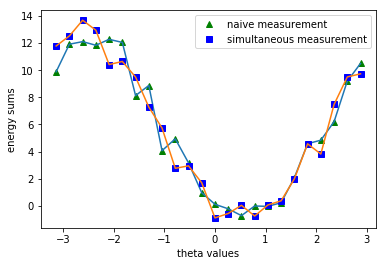

In [10]:
import matplotlib.pyplot as plt
plt.plot(theta_values, final_result_naive, 'g^', label = "naive measurement")
plt.plot(theta_values, final_result_naive)
plt.plot(theta_values, final_result_simultaneous, 'bs', label = "simultaneous measurement")
plt.plot(theta_values, final_result_simultaneous)
plt.legend(loc='best')
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()

# Compute and plot the difference from theory (many shots running on simulator)

In [11]:
values_theory = [12.191751999999997, 13.15524, 13.462224, 13.381992, 12.837567999999997, 11.637923999999998, 10.217920000000001, 8.380472000000001, 6.38668, 4.4392, 2.5525520000000013, 0.8814480000000007, -0.42213999999999907, -1.3090319999999995, -1.7176839999999993, -1.5886079999999994, -0.9050319999999998, 0.2661680000000004, 1.5365760000000002, 3.4022159999999992, 5.413296000000001, 7.372232, 9.278692, 10.918935999999999]
value_diff, value2_diff = [], []
for theta in range(len(theta_values)):
    value_diff.append(abs(final_result_naive[theta] - values_theory[theta]))
    value2_diff.append(abs(final_result_simultaneous[theta] - values_theory[theta]))

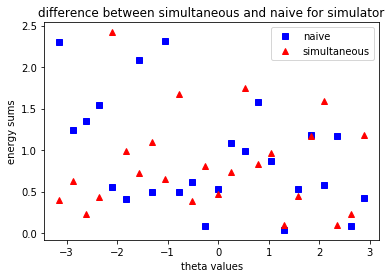

In [12]:
import matplotlib.pyplot as plt
plt.plot(theta_values, value_diff, 'bs', label='naive')
plt.plot(theta_values, value2_diff, 'r^', label='simultaneous')
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.title('difference between simultaneous and naive for simulator')
plt.legend()
plt.show()

In [13]:
len(['hi' for v1, v2 in zip(value_diff, value2_diff) if v1 > v2])

13

In [14]:
print(sum(value_diff))

22.554807999999994


In [15]:
print(sum(value2_diff))

20.03780799999999
